In [129]:
import pandas as pd
import requests
import datetime
import matplotlib.pyplot as plt

#Fairbanks Airport 64.816667, -147.866667 135m
#MET is 3m off the ground

#Importing Empirical data from Fairbanks MET Tower and
# cleaning it up a bit

empirical_df = pd.read_csv('FairbanksAirport.csv')
empirical_df.set_index('Year', inplace=True)

empirical_df = empirical_df.loc[1981:]

empirical_df


,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
1981,2.09,2.08,2.99,3.69,3.54,3.70,3.37,3.10,2.81,2.47,2.37,1.43
1982,1.94,2.16,2.40,2.96,3.46,3.02,3.20,2.47,2.92,2.89,1.56,1.93
1983,1.74,2.11,2.86,3.04,4.17,3.60,3.28,2.97,2.87,2.90,1.58,0.95
1984,1.42,1.55,2.74,2.76,3.34,2.93,3.48,3.05,2.38,2.36,1.71,1.23
1985,1.69,1.94,2.15,3.20,3.76,3.78,3.38,3.33,3.40,2.07,0.90,1.27
1986,1.65,1.57,2.31,3.14,3.22,3.27,3.39,2.79,2.73,2.36,1.06,1.25
1987,1.61,1.43,1.92,3.21,3.61,3.42,3.22,2.93,2.55,2.08,1.68,1.28
1988,1.16,2.34,3.12,3.51,3.09,2.86,2.80,2.57,2.11,2.21,1.72,1.61
1989,1.02,1.96,2.58,1.90,2.97,3.46,2.87,2.65,2.85,2.77,1.81,2.03


In [140]:
#NASA
nasa_df = pd.DataFrame(columns=['Year', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
nasa_df.set_index('Year')
for year in range(1973,2003):
    nasa_df.loc[len(nasa_df.index)] = [year, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
nasa_df = nasa_df.astype(float)
nasa_df = nasa_df.astype({'Year':int})
nasa_df.set_index('Year', inplace=True)
url = 'https://power.larc.nasa.gov/api/temporal/monthly/point?start=1981&end=2002&latitude=64.816667&longitude=-147.866667&community=ag&parameters=WS2M'
response = requests.get(url)
d = response.json()['properties']['parameter']['WS2M']

for time, speed in d.items():
    if time[-2:] != '13':
        dt = datetime.datetime.strptime(time[-2:], "%m")
        month_name = dt.strftime("%b").upper()
        nasa_df.loc[float(time[:-2])][month_name] = float(speed)
nasa_df = nasa_df.loc[1981:]
nasa_df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
Year,,,,,,,,,,,,
1981,1.99,1.75,1.54,1.17,0.89,0.84,0.84,0.80,0.79,0.99,1.50,1.45
1982,2.09,1.39,1.40,1.16,0.81,0.69,0.76,0.64,0.77,0.96,1.41,2.17
1983,2.47,1.99,2.02,1.02,1.16,0.73,0.63,0.69,0.74,1.04,1.32,1.60
1984,1.63,2.03,1.80,0.95,0.73,0.59,0.74,0.78,0.77,1.05,1.40,1.49
1985,1.81,1.77,1.24,1.16,0.88,0.75,0.72,0.70,0.78,0.95,1.24,1.67
1986,2.62,1.77,1.59,1.16,0.93,0.69,0.69,0.69,0.71,1.05,1.49,1.87
1987,1.95,1.80,1.52,1.12,0.98,0.84,0.73,0.70,0.77,0.90,1.74,1.27
1988,1.89,2.12,2.02,1.44,0.91,0.62,0.69,0.70,0.69,1.16,1.91,1.58
1989,1.26,1.51,1.89,0.93,0.77,0.82,0.66,0.63,0.82,1.05,1.48,1.96


In [133]:
nasa_error = abs(empirical_df.sub(nasa_df)).div(nasa_df)*100

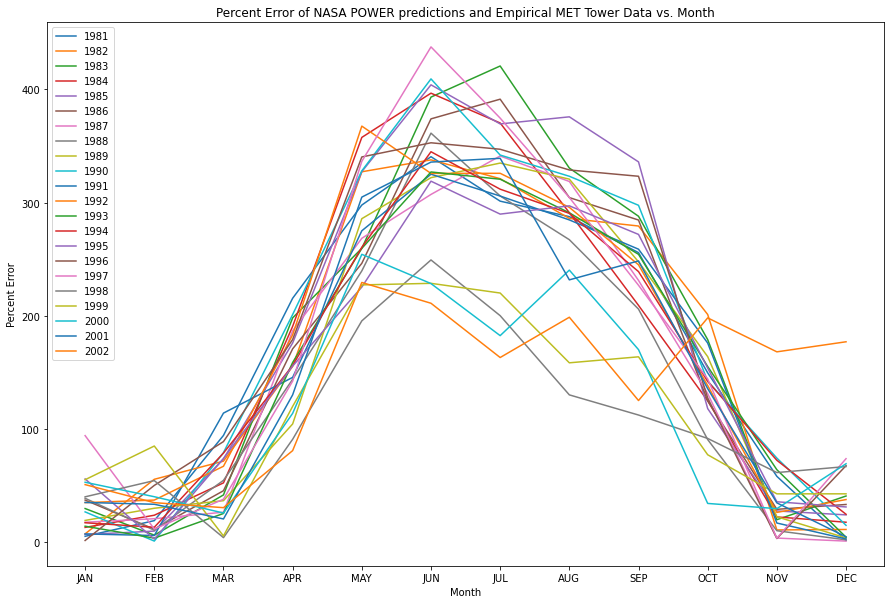

In [138]:
fig, ax = plt.subplots(1, 1, figsize=(15,10))
for year in range(1981, 2003):
    plt.plot(['JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'], nasa_error.loc[year], label=year)
plt.title("Percent Error of NASA POWER predictions and Empirical MET Tower Data vs. Month")
plt.xlabel("Month")
plt.ylabel("Percent Error")
plt.legend()
plt.show()

In [ ]:
#wind
wind_df = pd.DataFrame(columns=['Year', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'])
wind_df.set_index('Year')
for year in range(1973,2003):
    wind_df.loc[len(wind_df.index)] = [year, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
wind_df = wind_df.astype(float)
wind_df = wind_df.astype({'Year':int})
wind_df.set_index('Year', inplace=True)
url = 'https://power.larc.nasa.gov/api/temporal/monthly/point?start=1981&end=2002&latitude=64.816667&longitude=-147.866667&community=ag&parameters=WS2M'
response = requests.get(url)
d = response.json()['properties']['parameter']['WS2M']

for time, speed in d.items():
    if time[-2:] != '13':
        dt = datetime.datetime.strptime(time[-2:], "%m")
        month_name = dt.strftime("%b").upper()
        wind_df.loc[float(time[:-2])][month_name] = float(speed)
wind_df = wind_df.loc[1981:]
wind_df